<strong>Preliminary Analysis</strong> <br>
  <li><strong>Data Cleaning Code </strong> <br>
        Code for cleaning and processing your data. Include a data dictionary for your transformed dataset. 
    <ul> 
      <li>
      Data Dictionary:
        <ul>
            <li><strong>id</strong>: A unique identifier for each tweet</li>
            <li><strong>text</strong>: the text of the tweet</li>
            <li><strong>location</strong>: the location the tweet was sent</li>
            <li><strong>keyword</strong>: a particular keyword from the tweet</li>
            <li><strong>target</strong>: denotes whether a tweet is about a real disaster(1) or not(0)</li>
        </ul>
      </li> 
    </ul> 
  </li>
  <li><strong>Exploratory Analysis </strong> <br>
       Describe what work you have done so far and include the code. This may include descriptive statistics, graphs and charts, and preliminary models. 
    <ul> 
      <li>
        For this preliminary analysis, we noticed that there were inconsistencies in the data columns so we adjusted them using the steps in the next bullet point.
        <li>
          The <strong>keyword</strong> column did not extract all the disaster keywords from the text. So we extracted the keyword column and text column and applied a function to extract the correct keywords by word tokenizing and extracting the words which intersect with the disaster word vector. 
        <li>
          The same was done for the <strong>location</strong> column.
        </li>
        </li>
      </li> 
    </ul> 
  </li>
  <li><strong>Challenges </strong> <br>
        Describe any challenges you've encountered so far. Let me know if there's anything you need help with! 
    <ul> 
      <li>
        There were many challenges when attempting to correct the inconsistent data columns. 
      </li> 
      <li>
          The <strong>keyword</strong> column wasn't as difficult but still came as a challenge as attempting the fillna using normal means wasnt working for us. But, we figured it out. 
      </li> 
      <li>
        The <strong>location</strong> column was difficult. Hands down took the longest to implement and even now doesnt work correctly as there arent efficient and free NER libraries to extract 'GPE' from texts. We attempted using 3 different types, one of which included using <strong>spaCy</strong>, but that didnt work with Google Colab. The other two that we used were very time consuming to run. Took a whomping <strong>17~20 minutes</strong> when using on the train data set. 
      </li> 
    </ul> 
  </li>
  <li><strong>Future Work </strong> <br>
        Describe what work you are planning to complete for the final analysis.
    <ul> 
      <li>Future work involves using our cleaned data and features as input for models suited for classification, like Naive Bayes and Logisitic Regression and training these models</li> 
      <li>Making predictions off our trained models and evaluating performance with accuracy scores and confusion matrices</li>
      <li>Defining our grid of hyperparameter values and using GridSearchCV() to systematically find the best peforming model</li>
      </ul> 
  </li>
  <li><strong>Contributions </strong> <br>
        Describe the contributions that each group member made. 
    <ul> 
      <li>
      Daniel Hernandez
      <ul> 
        <li>Researched and acquired the datasets
        </li>
        <li>Helped in brainstorming. 
        </li> 
        <li>Created and organized juypter notebook
        </li>
        <li>Implemented visualizations of data for preliminary analysis
        </li>
        <li>Assisted in thinking of procedure to clean data columns
        </li>
    </ul> 
      </li> 
      <li>
      Justin Park
      <ul> 
        <li>Helped in brainstorming.
        </li>
        <li>Implemented functions to clean keyword and location columns.
        </li> 
        <li>Implemented procedure to clean data columns.
        </li>
    </ul> 
      </li> 
    </ul> 
  </li>
</ul>




Notes for 11/17

- How do we deal with empty values for Keyword and Location?
- How would those columns be inputted into our model?
- Are these columns worth adding to the model in the first place or should we omit them?
- Should we normalize our tweets?
- How should we tokenize our Tweets?
<br>
<br>
<h2>Notes for 11/19 </h2>
<strong>Data cleaning </strong>
<ul>
<li>clean location feature, there is dirty data such as dates, symbols, and numeric values. </li>
<li>fill in NA values with numpy's NaN for machine learning. </li>
<li>set up word vector for emergencies.</li>
<li>use word vector to fill in NA values in the keyword section from text. </li>
</ul>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import Tree
import spacy
# import matplotlib
# matplotlib.use('Agg')
!pip install locationtagger
import locationtagger
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,roc_curve,f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


     |████████████████████████████████| 1.6 MB 4.0 MB/s 
     |████████████████████████████████| 211 kB 53.3 MB/s 
     |████████████████████████████████| 10.1 MB 26.1 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
     |████████████████████████████████| 7.4 MB 42.9 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=57a2c0f2d340545b51d105283bb2b294568caae12d797f78c198098e7bf14793
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=1bdc69951a4a232a3cf4a37d241d02fd5d4b935c4d2ddee35527252a1d66afd5
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=7af19612253edb2c623b9e946c2c148

In [2]:
import nltk
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load('en')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
!pip install git+git://github.com/jmbielec/geograpy3.git 
!pip install git+https://github.com/jmbielec/geograpy3.git 
import geograpy3

  Cloning git://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-441p4dww
  Running command git clone -q git://github.com/jmbielec/geograpy3.git /tmp/pip-req-build-441p4dww
     |████████████████████████████████| 137 kB 4.2 MB/s 
  Created wheel for geograpy3: filename=geograpy3-1.0.0-py3-none-any.whl size=1326792 sha256=12f88a5ad941e0c34ced4378194485d45049314a08c3a091ae93a153a949810e
  Stored in directory: /tmp/pip-ephem-wheel-cache-078cf3cp/wheels/c5/8c/fa/b055a729077480c4fcd0cbb0a47e5207b2657083a8ca1f5512
  Created wheel for jellyfish: filename=jellyfish-0.8.9-cp37-cp37m-linux_x86_64.whl size=73226 sha256=72b11e81aa929859a5ab02605aa2a922b4a09161e681de7d1762398df921d158
  Stored in directory: /root/.cache/pip/wheels/32/a9/ef/5d8742e72deaf0d1de327a180d008c2c0299367581800ea73f
Successfully built geograpy3 jellyfish
  Cloning https://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-i464yuc5
  Running command git clone -q https://github.com/jmbielec/geograpy3.git /tmp/pip-r

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# First lets get a general idea of what our data looks like:

In [5]:
# Count the amount of rows and columns
print("Shape of train_df:", train_df.shape)
print('\n\n')
# Counting the amount of missing values
print("null values:\n", train_df.isnull().sum())
print('\n\n')
# Observing the DataFrame's summary
train_df.info()

Shape of train_df: (7613, 5)



null values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df.isna().sum() # looks like we have some null values we need to fill in

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


*   It looks like we need to fill in some values for keyword and location
*   Lets see if we can fill in these values based on what we find in the 'text' values

<h2>Fill in missing values for keyword column </h2>

In [8]:
# create word vector which contains the dissaster keywords
dissaster_vector = set(train_df['keyword'].unique());
# function which will fill in missing values for keyword column dependent on text column 
def fillKey(text):
  # tokenize the text and store into text_vector
  text_vector = set(word_tokenize(text.lower()))
  # find the dissaster keywords in text_vector
  filler = list(set.intersection(dissaster_vector, text_vector))
  # combine the filler array with a delimiter matching that of original format from keyword column
  filler = '%20'.join(filler)
  return filler

In [9]:
# auxilery DataFrame to handle DataFrame.apply()
t_df = pd.DataFrame()
t_df['keyword'] = train_df['text'].copy()
t_df.head()

,keyword
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [10]:
# fill missing values for keyword column
t_df['keyword'] = t_df['keyword'].apply(fillKey)

# check if it worked
print(t_df.head(), '\n\n')
print(t_df.isnull().sum())

      keyword
0  earthquake
1        fire
2  evacuation
3  evacuation
4       smoke 


keyword    0
dtype: int64


In [11]:
# before replace missing
display(train_df.head())

# replacing the missing keyword values
train_df['keyword'] = t_df['keyword']

# after replace missing
display(train_df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<h2>Now to fill in missing values for locations </h2>

In [12]:
def fillTagLoc(txt):
  txt = re.sub(r'[#|@]',r'',txt)
  place_entity = locationtagger.find_locations(text = txt)
  filler = '%20'.join(set(place_entity.countries + place_entity.regions + place_entity.cities))
  return filler

In [13]:
def fillGeoLoc(text_input):
  text_input = re.sub(r'[#|@]',r'',text_input)
  place_entity = geograpy3.get_place_context(text = text_input)
  filler = '%20'.join(set(place_entity.countries + place_entity.regions + place_entity.cities))
  return filler

In [14]:
test_str = train_df['text'][5]

print(test_str, '\n\n')

# testing the fillLoc function
print('fillTagLoc:\n',fillTagLoc(test_str), '\n\n' )
print('fillGeoLoc:\n',fillGeoLoc(test_str), '\n\n' )

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires 


fillTagLoc:
  


fillGeoLoc:
 CAfire%20Lake County%20Update%20RockyFire 




In [15]:
# now that we've gotten keyword column missing values filled in where it could, time to do same for location. 
# auxilery DataFrame to handle DataFrame.apply()
l_df = pd.DataFrame()
l_df['location'] = train_df['text'].copy()
l_df.head()

# fill missing values for keyword column.... ** WARNING !!! this took 17m to execute!
l_df['location'] = l_df['location'].apply(fillTagLoc)


In [16]:
# check if it worked
print(l_df.head(), '\n\n')
print(l_df.isnull().sum())

          location
0                 
1  Forest%20Canada
2                 
3       California
4                  


location    0
dtype: int64


In [17]:
# Great! it worked~~~~~~ 
# before 
display(train_df.head(10))
# now to fill in the missing values 
train_df['location'].fillna(l_df['location'], inplace=True)
# after
display(train_df.head(10))

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,fire,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,disaster%20flooding%20flood,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,fire,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,evacuation%20emergency,NaN,There's an emergency evacuation happening now ...,1
9,15,tornado,NaN,I'm afraid that the tornado is coming to our a...,1


,id,keyword,location,text,target
0,1,earthquake,,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,Forest%20Canada,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,California,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,,Just got sent this photo from Ruby #Alaska as ...,1
5,8,fire,,#RockyFire Update => California Hwy. 20 closed...,1
6,10,disaster%20flooding%20flood,Colorado Springs%20Manitou,#flood #disaster Heavy rain causes flash flood...,1
7,13,fire,,I'm on top of the hill and I can see a fire in...,1
8,14,evacuation%20emergency,,There's an emergency evacuation happening now ...,1
9,15,tornado,,I'm afraid that the tornado is coming to our a...,1


In [18]:
# In order to one hot encode this properly, we can only take the first keyword:

def cleankeyword(data,column):
    str1=' '
    final_string=[]
    s=''
    for sent in data[column]:
        filter_sent = []
        str1 = sent.split("%20")
        final_string.append(str1[0])
    data['clean_keyword'] = np.array(final_string)

cleankeyword(train_df,'keyword')

print(train_df.columns)
train_df.head(10)

Index(['id', 'keyword', 'location', 'text', 'target', 'clean_keyword'], dtype='object')


,id,keyword,location,text,target,clean_keyword
0,1,earthquake,,Our Deeds are the Reason of this #earthquake M...,1,earthquake
1,4,fire,Forest%20Canada,Forest fire near La Ronge Sask. Canada,1,fire
2,5,evacuation,,All residents asked to 'shelter in place' are ...,1,evacuation
3,6,evacuation,California,"13,000 people receive #wildfires evacuation or...",1,evacuation
4,7,smoke,,Just got sent this photo from Ruby #Alaska as ...,1,smoke
5,8,fire,,#RockyFire Update => California Hwy. 20 closed...,1,fire
6,10,disaster%20flooding%20flood,Colorado Springs%20Manitou,#flood #disaster Heavy rain causes flash flood...,1,disaster
7,13,fire,,I'm on top of the hill and I can see a fire in...,1,fire
8,14,evacuation%20emergency,,There's an emergency evacuation happening now ...,1,evacuation
9,15,tornado,,I'm afraid that the tornado is coming to our a...,1,tornado


In [19]:
# locations using spaCy 
# using .apply via PandaSeries instead of DataFrame
# location_df = train_df["text"].apply(nlp)

# print(location_df.ents)
# test_df.loc[df['keyword'] == null] = ['ablaze if']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


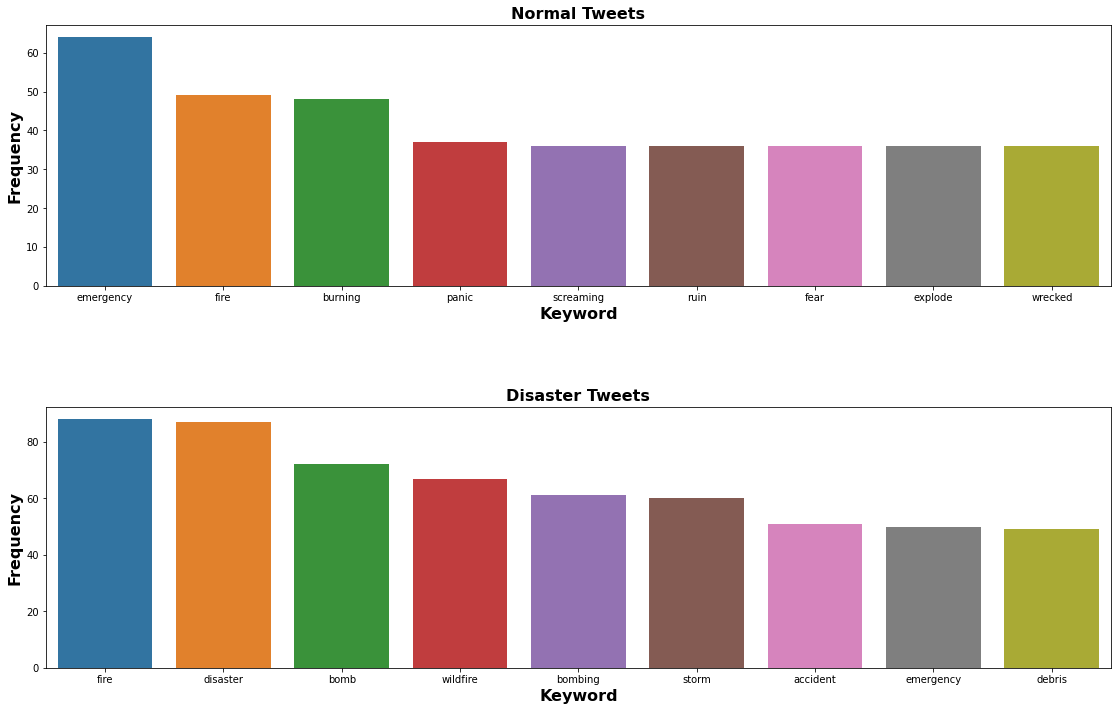

In [20]:
fig,axes= plt.subplots(2,1,figsize=(18,12))
fig.tight_layout(pad=10.0)

temp = pd.DataFrame(train_df[train_df['target']==0].groupby('clean_keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
ax1 = sns.barplot(temp.index[1:10],temp['id'][1:10],ax=axes[0])
axes[0].set_title('Normal Tweets', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=16)
axes[0].set_xlabel('Keyword', fontweight='bold', fontsize=16)

temp = pd.DataFrame(train_df[train_df['target']==1].groupby('clean_keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
ax2 = sns.barplot(temp.index[1:10],temp['id'][1:10],ax=axes[1])
axes[1].set_title('Disaster Tweets', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold', fontsize=16)
axes[1].set_xlabel('Keyword', fontweight='bold', fontsize=16)

plt.show()

Based on the top keywords for Tweets that were and were not about a disaster:
*   It seems like both kind of tweets share some keywords, making it look like keywords are not helpful in deciding whether or not a Tweet is about a disaster or not
* However, there are some words that seem to be in Tweets about disasters and Tweets not about disasters
  * Storm
  * Bombing
  * Collapse
  * Accident



# Word Cloud for Normal Tweets and Tweets about Disasters

In [21]:
# cleaning "text" column of train and test dataset and saving it to column 'clean_txt'

#stopwords = set(stopwords.word('english'))
# function for removing html
def cleanhtml (sentence):
    cleantext = re.sub(r'http\S+',r'',sentence)
    return cleantext

# function for removing punctuation
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#@_%$\n:"]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|)|\|/]',r' ', cleaned)  
    cleaned = re.sub(r'[0-9]', r'', cleaned)
    cleaned = re.sub(r'[ ]{2,}', r' ', cleaned)
    cleaned = re.sub(r'amp', r'', cleaned)
    return cleaned
# function for cleaning 'column' of dataframe 'data' and saving cleaned text in column 'clean_txt'
def cleantxt(data,column):
    str1=' '
    final_string=[]
    s=''
    for sent in data[column]:
        filter_sent = []
        rem_html = cleanhtml(sent)
        rem_punc = cleanpunc (rem_html)
        str1 = rem_punc.lower()
        final_string.append(str1)
    data['clean_txt'] = np.array(final_string)

cleantxt(train_df,'text')

print(train_df.columns)
train_df.head()

Index(['id', 'keyword', 'location', 'text', 'target', 'clean_keyword',
       'clean_txt'],
      dtype='object')


,id,keyword,location,text,target,clean_keyword,clean_txt
0,1,earthquake,,Our Deeds are the Reason of this #earthquake M...,1,earthquake,our deeds are the reason of this earthquake ma...
1,4,fire,Forest%20Canada,Forest fire near La Ronge Sask. Canada,1,fire,forest fire near la ronge sask canada
2,5,evacuation,,All residents asked to 'shelter in place' are ...,1,evacuation,all residents asked to shelter in place are be...
3,6,evacuation,California,"13,000 people receive #wildfires evacuation or...",1,evacuation,people receive wildfires evacuation orders in...
4,7,smoke,,Just got sent this photo from Ruby #Alaska as ...,1,smoke,just got sent this photo from ruby alaska as s...


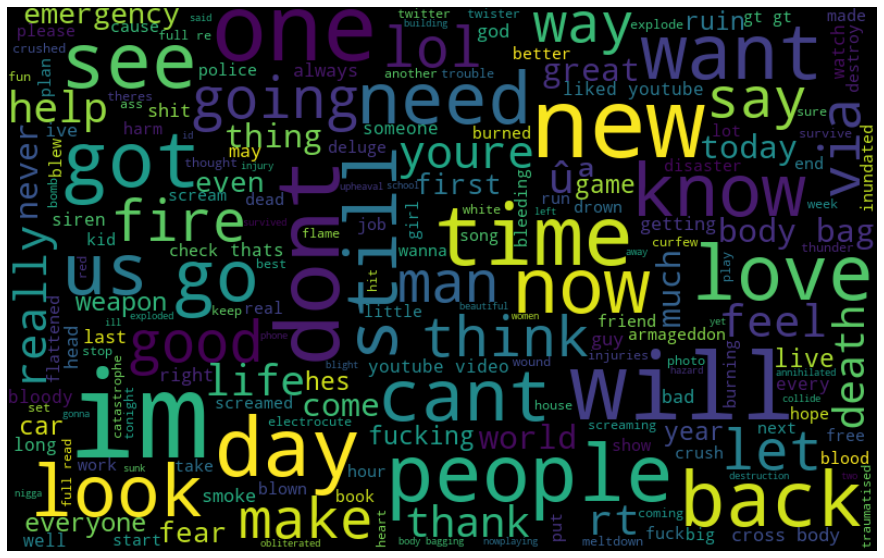

In [22]:
all_words = ' '.join([text for text in train_df['clean_txt'][train_df['target']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() # note to self; remove links

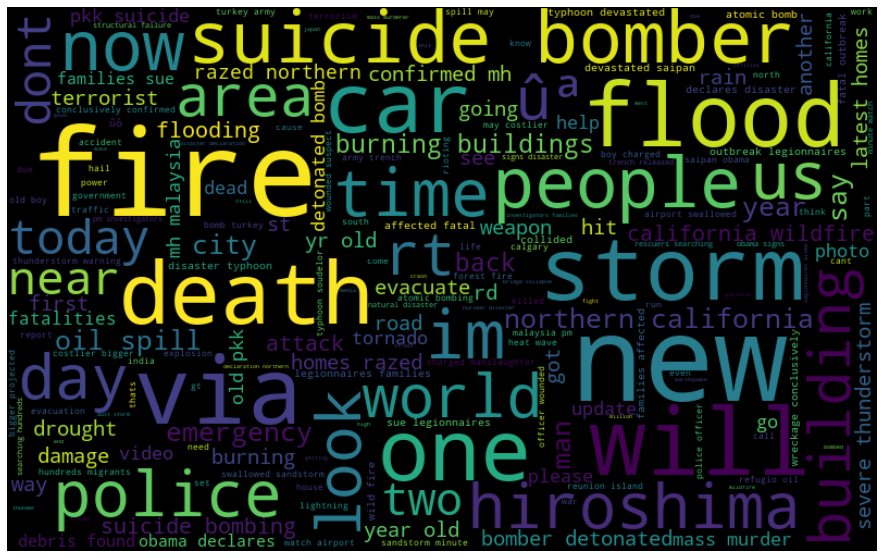

In [23]:
all_words = ' '.join([text for text in train_df['clean_txt'][train_df['target']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() # note to self; remove links

* The difference in words for normal Tweets and Tweets about Disasters are day and night

Questions Regarding Models:
- We need to convert train_df['clean_txt'] into numbers for our model(s). We will use TfidfVectorizer(), but it only accepts a column as input to fit + transform. We want to use all columns in our dataset in our model(s), how can we do this?
  - Idea: Use TfidfVectorizer() to convert train_df['clean_txt'] into a feature matrix, the use hot-one-encoding to convert train_df['keyword'] and either use tfidfVectorizer() on train_df['location'] or hot-one-encode that as well. Then we feed all these columns into our model of choice
   - OR we could make the argument that train_df['location'] and train_df['keyword'] do not add any additional information since both are based on the content in train_df['clean_txt'], and omit those columns from our model(s)

## Let's try implementing a model using our our train_df['clean_txt'] column since that is easier:

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=300, stop_words='english')
# max_df defines the frequency cutoff for words in the document; 
# so we will remove words that appear in more that 90% of the document. Why? Because words that appear close to 100% of all Tweets
# will not help in deciding whether a Tweet is about a disaster or not

# Same idea with min_df, but for words that appear too infrequently

# max_features is self explaining, but why? To prevent overfitting by reducing the complexity of the model

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(train_df['clean_txt'])

In [25]:
tfidf.shape

(7613, 300)

In [26]:
tfidf[10]

<1x300 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [31]:
train_df.shape

(7613, 7)

In [32]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, train_df['target'], test_size=0.30, random_state=42)

## Logistic Regression

In [33]:
# creating Logreg object and fitting our data to it
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [34]:
# evaluating our model performance

y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.749124343257443


array([[1111,  207],
       [ 366,  600]])

In [35]:
# Print the recall
print(recall_score(y_test, y_pred))

# Print the precision
print(precision_score(y_test, y_pred))

0.6211180124223602
0.7434944237918215


In [36]:
print(train_df[train_df['target'] == 0].shape[0]) # not disaster
print(train_df[train_df['target'] == 1].shape[0]) # disaster

4342
3271


Here we have to decide what we deem more important in our model; to be better at identifying normal tweets or at identifying disaster tweets?

Let's say we want to be better at identifying disaster tweets, which metric do we care about the most and how would we adjust our data??

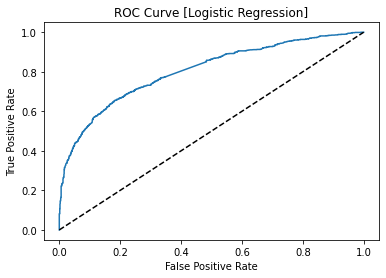

ROC AUC Score: 0.8043607856812977


In [37]:
# create ROC curve

# generate the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve [Logistic Regression]")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

print("ROC AUC Score:",roc_auc_score(y_test, y_pred_prob))

74% Accuracy and a 0.80 ROC area under curve score; not bad. Let's try some hyperparameter tuning:

In [38]:
# dictionary of parameters and their values to iterate through to find the best combination
params = {'solver':['liblinear','lbfgs'], 'max_iter':[100, 200, 300, 400], 'tol':[0.01, 0.001, 0.0001, 0.00001]}

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=params, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(tfidf, train_df['target'])

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.659667 using {'max_iter': 100, 'solver': 'liblinear', 'tol': 0.001}


In [39]:
# creating Logreg object and fitting our data to it
logreg = LogisticRegression(max_iter=200, solver='liblinear', tol=0.001)
logreg = logreg.fit(X_train, y_train)

# evaluating our model performance

y_pred = logreg.predict(X_test)
y_pred_new_threshold = (logreg.predict_proba(X_test)[:,1]>=0.85).astype(int)
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion matrix with 0.85 threshold:\n", confusion_matrix(y_test, y_pred_new_threshold))

Accuracy of logistic regression classifier:  0.7495621716287215
Confusion matrix:
 [[1111  207]
 [ 365  601]]
confusion matrix with 0.85 threshold:
 [[1312    6]
 [ 814  152]]


Hmm, that seems to have barely made any significant improvement, at least with our dictionary of hyperparameters

## Naive Bayes

In [40]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred)
print(cm)

0.7469352014010507
[[1118  200]
 [ 378  588]]


In [41]:
# improving Naive Bayes model

# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(X_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(X_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.7464973730297724

Alpha:  0.1
Score:  0.7469352014010507

Alpha:  0.2
Score:  0.7473730297723292

Alpha:  0.30000000000000004
Score:  0.7460595446584939

Alpha:  0.4
Score:  0.7460595446584939

Alpha:  0.5
Score:  0.7473730297723292

Alpha:  0.6000000000000001
Score:  0.7473730297723292

Alpha:  0.7000000000000001
Score:  0.7478108581436077

Alpha:  0.8
Score:  0.7478108581436077

Alpha:  0.9
Score:  0.7482486865148862



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
